# Изучение закономерностей, определяющих успешность игр
## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Необходимо выявить определяющие успешность игры закономерности.** Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Необходимо проанализировать их для того, чтобы спланировать кампанию на 2017-й. 

<font color = 'grey'  size = 2>*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*</font>

## Итоги проекта
Выявлены параметры, определяющие успешность игры в разных регионах мира. На основании этого подготовлен отчет для магазина компьютерных игр для планирования рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный период для анализа. Составлены портреты пользователей каждого региона. Проверены гипотезы: 
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные. 

При анализе использовал критерий Стьюдента для независимых выборок.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

# 1. Изучение общей информации
## 1.1 Общие сведения

In [3]:
data = pd.read_csv('games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [7]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [8]:
data['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [9]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [10]:
#проверка на целочисленность данных в поле Critic_score
tmp = data.loc[data['Critic_Score'].notna()]['Critic_Score']            
if np.array_equal(tmp, tmp.astype(int)):
    print('Данные в столбце Critic_Score целочисленные')

Данные в столбце Critic_Score целочисленные


## 1.2 Выводы

Названия столбцов необходимо привести к единому виду: нижнему регистру.

В следующих колонках есть пропуски, нужно их обработать:

- Name               
- Year_of_Release   
- Genre           
- Critic_Score      
- User_Score       
- Rating        

Изменить тип данных: 

- Year_of_Release: из `float64` в `int`, так как это порядковый номер года, не бывает дробным
- Critic_Score: из `float64` в `int`, так как все данные в этом поле целочисленные
- User_Score: из `object` в `float`, так как это численное значение, с которым необходимо проводить вычислителные операции.  

Назвния игровых платформ, жанров не дублируются, очевидных ошибок в написании нет.   

# 2. Подготовка данных
## 2.1 Приведение к нижнему регистру

In [11]:
#приведение названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 2.2 Замена типов данных

Замена типа данных в поле *user_score* в два этапа: 
- заменяем значения 'tbd' на `None`. TBD = To be determined. Соотственно это отсутствующее значение.
- приводим к типу `float64`,  так как в значениях присутствуют Nan'ы; не-Nan значения не целочисленные

Замена типа данных в полях `critic_score`, `year_of_release` приводим к типу `Int64`, так как в значениях присутствуют Nan'ы.

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None
data['user_score'] = data['user_score'].astype('float64')
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('float64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


## 2.3 Пропуски в данных
### 2.3.1 Название и жанр игры

Две строки, в которых нет информации о имени и жанре, можно удалить, так как они не дают представления ни о жанре, ни об оценке. Использовать их для определения успешности игр затруднительно. По сути это мусор, который можно безболезненно удалить.

In [14]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
data.dropna(subset = ['name'], inplace = True)

### 2.3.2 Оценка критиков, оценка пользователей, рейтинг

Посмотрим распределение оценки критиков и пользователей.

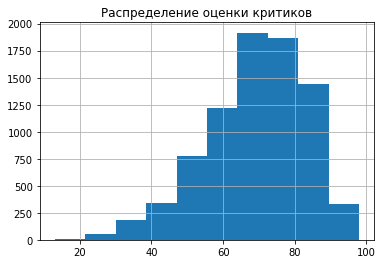

In [17]:
data['critic_score'].hist(bins = 10)
plt.title('Распределение оценки критиков')
plt.show()

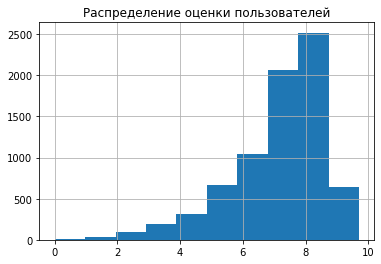

In [18]:
data['user_score'].hist(bins = 10)
plt.title('Распределение оценки пользователей')
plt.show()

Посмотрим какой % от данных составляют пропуски.

In [19]:
for element in ['critic_score','user_score','rating']:
    print('Количество пропусков в поле', element, 'до:', data[element].isna().sum())
    print('Это {:.2%}'.format(data[element].isna().sum()/len(data)))
    print('---')

Количество пропусков в поле critic_score до: 8576
Это 51.31%
---
Количество пропусков в поле user_score до: 9123
Это 54.59%
---
Количество пропусков в поле rating до: 6764
Это 40.47%
---


In [20]:
#проверяем, по каким годам нет данных об оценке критиков
data.groupby('year_of_release')['critic_score'].sum().to_frame()

,critic_score
year_of_release,
1980,0.0
1981,0.0
1982,0.0
1983,0.0
1984,0.0
1985,59.0
1986,0.0
1987,0.0
1988,64.0


In [21]:
#проверяем, по каким годам нет данных об оценке пользователей
data.groupby('year_of_release')['user_score'].count().to_frame()

,user_score
year_of_release,
1980,0
1981,0
1982,0
1983,0
1984,0
1985,1
1986,0
1987,0
1988,1


In [22]:
#проверяем, по каким годам нет данных о рейтинге
data.groupby('year_of_release')['rating'].count().to_frame()

,rating
year_of_release,
1980,0
1981,0
1982,0
1983,0
1984,0
1985,1
1986,0
1987,0
1988,1


In [23]:
data.query('year_of_release in (1985,1988, 1992, 1994) and critic_score.notna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1567,Battle Arena Toshinden,PS,1994,Fighting,0.39,0.26,0.53,0.08,69.0,6.3,T
14470,Alter Ego,PC,1985,Simulation,0.00,0.03,0.00,0.01,59.0,5.8,T
14610,Doom,PC,1992,Shooter,0.02,0.00,0.00,0.00,85.0,8.2,M
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+


Пропуски по полям *critic_score, user_score* оставляем без изменений.
Пропуски в поле *rating* меняем на значение "unknown". Подробнее в выводах.

In [24]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

### 2.3.3 Год выпуска

In [25]:
print('Количество пропусков в поле year_of_release до:', data['year_of_release'].isna().sum())
print('Это {:.2%}'.format(data['year_of_release'].isna().sum()/len(data)))

Количество пропусков в поле year_of_release до: 269
Это 1.61%


In [26]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,unknown
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,unknown


Для некоторых игр можно доcтать год из названия игры. 

In [27]:
data['year_test'] = data['name'].str.extract('([0-9]{4}$)').astype('float')
data.loc[data['year_of_release'].isna(), 'year_of_release'] = data['year_test']
data.drop('year_test', axis = 1, inplace = True)

In [28]:
#проверка, что определение года для всех прошло успешно
data.loc[(data['name'].str.contains("20..$", regex=True)) & (data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [29]:
print('Количество пропусков в поле year_of_release после:', data['year_of_release'].isna().sum())
print('Это {:.2%}'.format(data['year_of_release'].isna().sum()/len(data)))

Количество пропусков в поле year_of_release после: 254
Это 1.52%


### 2.3.4 Суммарные продажи во всех регионах

In [30]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


## 2.4 Дубликаты

In [31]:
data.duplicated().sum()

0

Полных дубликатов нет

## 2.5 Выводы
До 1996 года нет данных об оценках и рейтинге (за исключением четырех редких случаев — для игр, которые очевидно вызвали резонанс и были популярны долгое время). Можно сделать предположение, что данные отсутствуют в зависимости от неизвестных факторов. Таким фактором может быть например отсутствие единой системы оценки игр до 1996 года. Но так как мы не можем знать наверняка, то и удалить/заменить пропуски на конкретные значения мы не можем. 

Для поля *rating* заменили пропуски на тип unknown для целей анализа.

Если бы пропуски были рандомными, то для полей *critic_score, user_score* их можно было бы заменить медианным значением внутри группы: жанр-платформа. Помимо этого количество пропусков более +/- 50%. Такая замена исказит данные и сместит оценку.

Год выпуска не указан для 1,6% записей (удалось сократить до 1,5%). Это некритичное количество пропусков, удалять их не будем, так как остальная информация релевантна для исследования.

# 3. Исследовательский анализ данных

## 3.1 Выпуск игр в разные годы

Text(0, 0.5, 'Количество выпущенных игр, шт.')

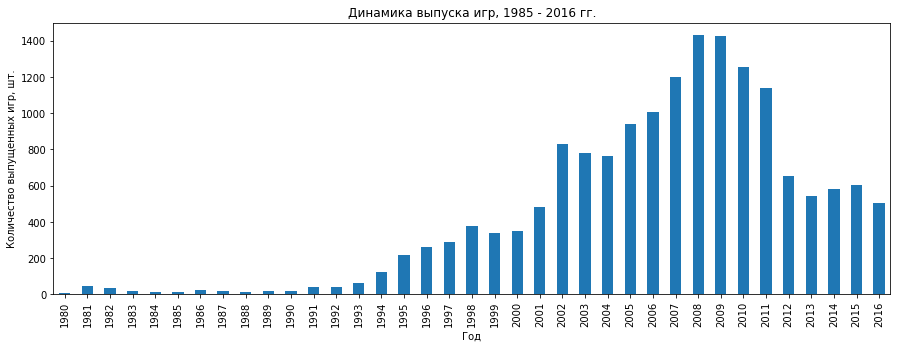

In [32]:
data_grouped = data.groupby('year_of_release')['name'].count()
data_grouped.plot(kind = 'bar', figsize = (15,5))
plt.title('Динамика выпуска игр, 1985 - 2016 гг.')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр, шт.')

Для исследования не важны данные за все годы, так как предпочтения менялись, менялись платформы. Данные до 1996 года очень немногочисленные. Видно, что к концу нулевых интерес к играм был на пике, их выпускали в большом количестве. Затем стали выпускать меньше. В игровой индустрии стоит ориентироваться на последние актуальные данные, так как вводные очень быстро меняюьтся и зависят от большого количества переменных и неизвестных: конекуренция на рынке, новые технологии, молодежные тренды и пр.

## 3.2 Изменения продаж по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
За какой характерный срок появляются новые и исчезают старые платформы?

In [33]:
#создаем список из топ-10 платформ по объему продаж за все время
df = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index().head(10)
top_platform = df['platform'].tolist()
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

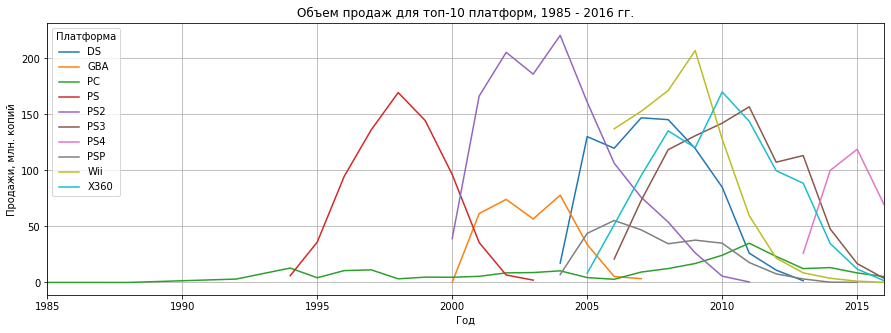

In [34]:
data.query('platform in @top_platform').pivot_table(index = 'year_of_release',
                                                    columns = 'platform',
                                                    values = 'total_sales',
                                                    aggfunc = 'sum').plot(figsize = (15,5), grid = True)
plt.title('Объем продаж для топ-10 платформ, 1985 - 2016 гг.')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')
plt.legend(title = 'Платформа', loc = 'upper left')
plt.show()

График показывает очень интересную и динамическую драму. 
Видно цикличность в появлении новых платформ PlayStation, короткая и насыщенная жизнь PSP, резкий взлет и падение Wii, и плавную и уравновешенную линию PC.

Определим характерный срок жизни платформы. 
Для этого посмотрим для каждой платформы годы, в которые продажи были больше минимального порога. Минимальный порог определим исходя из  первого квартиля по общей сумме продаж в разрезе год-платформа. 

In [35]:
#группируем по платформе и году, вычисляем суммы продаж в этом разрезе, находим первый квартиль
report = data.pivot_table(index = ['platform', 'year_of_release'],
                          values = 'total_sales',
                          aggfunc = 'sum').reset_index()

threshold = report['total_sales'].describe()['25%']
print('Первый квартиль =', threshold, 'млн. проданных копий.')

Первый квартиль = 3.62 млн. проданных копий.


In [36]:
#накладываем ограничение снизу по количеству проданных копий, 
#находим первый и последний год жизни платформы с такими или большими продажами
report = (
    report
    .query('total_sales > @threshold')
    .groupby('platform')['year_of_release']
    .agg({'year_of_release': ['min', 'max']})
    .reset_index()
)

#вычисляем дельту между годами для каждой платформы
report['life_time'] = report['year_of_release', 'max'] - report['year_of_release', 'min']

#находим средний показатель времени жизни платформы
mean_life_time = report['life_time'].mean()
print('Характерный срок жизни платформы —', mean_life_time, 'лет')

Характерный срок жизни платформы — 6.625 лет


## 3.3 Определение актульного периода для построения прогноза
Определим соответствующий актуальный период, чтобы далее рассматривать только данные за этот период. Эти данные помогут построить прогноз на 2017 год.

**Актуальный период:**
[год, на который строим прогноз, минус характерный срок жизни платформы; год, на который строим прогноз]

Характерный срок жизни получился нецелочисленным. Округлим его в меньшую сторону, чтобы избежать ошибки: сужение интервала предполагает меньшую ошибку, чем его искуственное увеличение.

In [37]:
#вычисляем год начала актуального периода
current_year = 2017
left_limit_year = current_year - int(mean_life_time)
print('Актуальный период: c', left_limit_year, 'по', current_year)

Актуальный период: c 2011 по 2017


In [38]:
actual_data = data.query('@left_limit_year <= year_of_release < @current_year')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [39]:
actual_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,1813.000000,2033.000000,4023.000000
mean,2013.092468,0.206254,0.166500,0.061061,0.051931,71.260342,6.633497,0.485747
std,1.776245,0.570379,0.482808,0.220223,0.155324,13.105682,1.541063,1.219370
min,2011.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,64.000000,5.800000,0.040000
50%,2013.000000,0.040000,0.030000,0.000000,0.010000,74.000000,7.000000,0.130000
75%,2015.000000,0.170000,0.130000,0.050000,0.040000,81.000000,7.800000,0.405000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


In [40]:
actual_data.query('platform in @top_platform').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,1269.000000,1438.000000,2688.000000
mean,2012.718006,0.224487,0.192995,0.040863,0.062872,71.609141,6.533658,0.521217
std,1.749076,0.610207,0.541864,0.110681,0.181133,13.187621,1.574468,1.280425
min,2011.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,64.000000,5.700000,0.050000
50%,2012.000000,0.050000,0.030000,0.000000,0.010000,74.000000,6.900000,0.140000
75%,2014.000000,0.190000,0.150000,0.040000,0.050000,81.000000,7.700000,0.442500
max,2016.000000,9.660000,9.090000,3.140000,3.960000,97.000000,9.300000,21.050000


## 3.4 Опредение динамики продаж в разбивке по платформам
Кто растет, падает? Выберем несколько потенциально прибыльных платформ. 

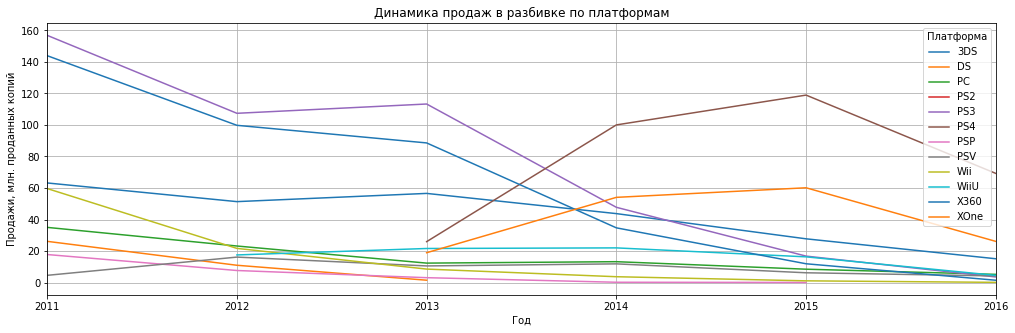

In [41]:
actual_data.pivot_table(index = 'year_of_release',
                        columns = 'platform',
                        values = 'total_sales',
                        aggfunc = 'sum').plot(figsize = (17,5), grid = True)
plt.xticks(np.arange(min(actual_data['year_of_release']), max(actual_data['year_of_release'])+1, 1.0))
plt.title('Динамика продаж в разбивке по платформам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. проданных копий')
plt.legend(title = 'Платформа', loc ='best')
plt.show()

В качестве потенциально прибыльных из представленных платформ стоит рассмотреть PS4, X360, XOne, PC. Первые две до 2015 года показывали рост, на 2017 год все еще являются достаточно новыми - прошли только половину среднего жизненного времени платформы. XOne — входит в топ платформ и по состоянию на 2016 год находится на одном уровне по продажам со свежей XOne. PC — стабильная, на нее просто можно положиться. Остальные платформы показывают падение продаж.

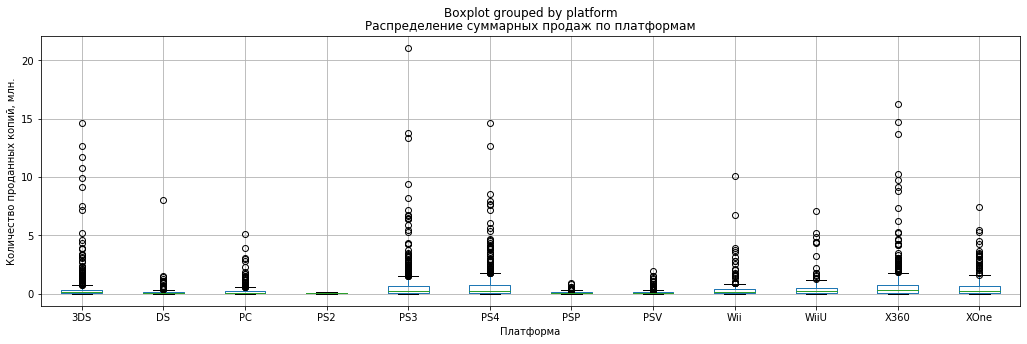

In [42]:
actual_data.boxplot('total_sales', by='platform', figsize=(17, 5), showfliers = True)
plt.title('Распределение суммарных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн.')
plt.show()

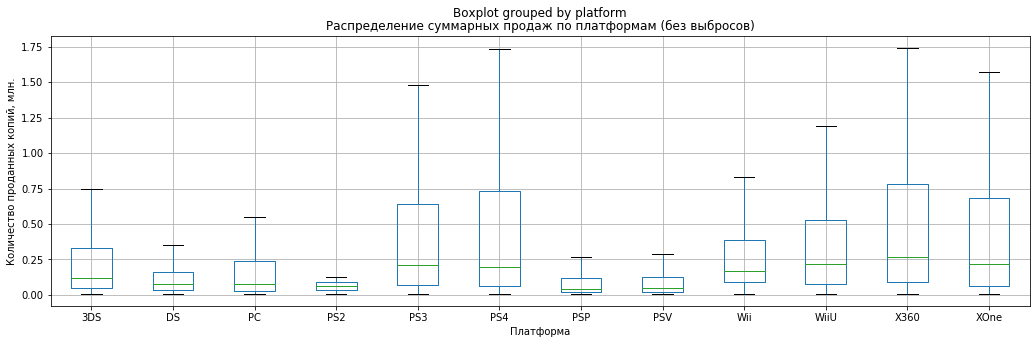

In [43]:
actual_data.boxplot('total_sales', by='platform', figsize=(17, 5), showfliers = False)
plt.title('Распределение суммарных продаж по платформам (без выбросов)')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн.')
plt.show()

Так как мы построили боксплоты за весь актуальный период, то на нем видно высокие продажи по платформам, которые были на пике популярности в начале актуального периода: PS3, X360, 3DS. Но ближе к концу периода их обгоняет PS4 и почти догоняет XOne. 

Медиана по всем представленным платформам находится в диапазоне до 0,25 млн. копий. Это говорит о том, что в среднем на все платформы спрос плюс-минус одинаковый, но стоит подумать о том, какой именно жанр на каждой из платформ максимално востребован. Самое большое медианное значение у X360.

Большой разброс для платформ PS3, PS4, WiiU, X360 и XOne говорит о том, что линейка игр на этих платформах очень разнообразная: от очень популярных, до так себе популярных игр.

## 3.5 Влияние на продажи отзывов пользователей и критиков. 
Построим диаграмму рассеяния  внутри одной популярной платформы и посчитайте корреляцию между отзывами и продажами.

,critic_score,user_score,total_sales
critic_score,1.000000,0.563315,0.380111
user_score,0.563315,1.000000,0.014089
total_sales,0.380111,0.014089,1.000000


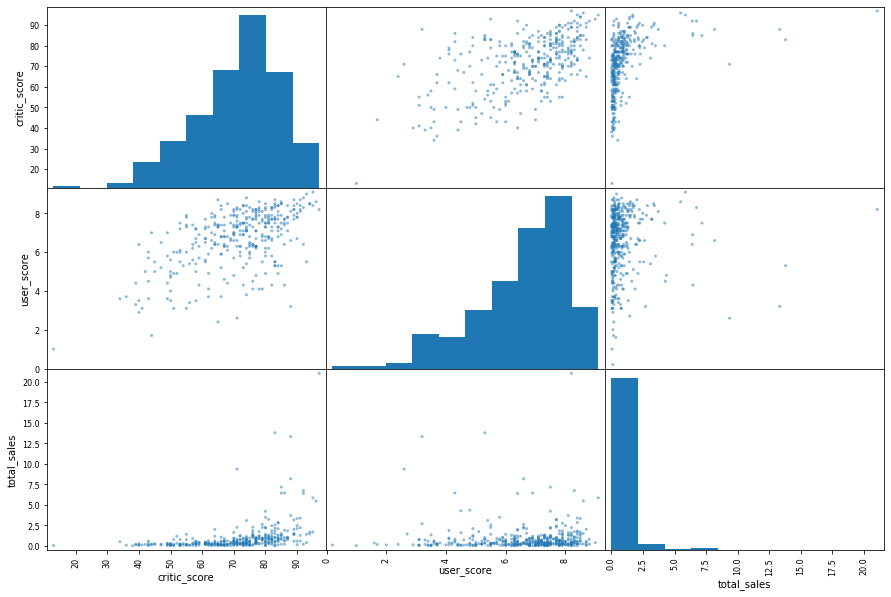

In [44]:
actual_data_ps3 = actual_data.query('platform == "PS3"')[['critic_score', 'user_score', 'total_sales']]
display(actual_data_ps3.corr())
pd.plotting.scatter_matrix(actual_data_ps3, figsize = (15,10))
plt.show()

In [45]:
print('Корреляция между оценкой критиков и продажами: {:.2f}'.format(actual_data_ps3.corr()['critic_score']['total_sales']))
print('Корреляция между оценкой пользователей и продажами: {:.2f}'.format(actual_data_ps3.corr()['user_score']['total_sales']))

Корреляция между оценкой критиков и продажами: 0.38
Корреляция между оценкой пользователей и продажами: 0.01


Между отзывами и продажами нет значимой зависимости. Но если сравнивать их между собой, то продажи сильнее зависят от оценок критиков. 
Для платформы есть большое количество выбросов. Посмотрим на корреляцию между параметрами, отбросив выбросы, то есть рассмотрев только  +/- 1,5IQR

,critic_score,user_score,total_sales
critic_score,1.000000,0.594440,0.496421
user_score,0.594440,1.000000,0.146025
total_sales,0.496421,0.146025,1.000000


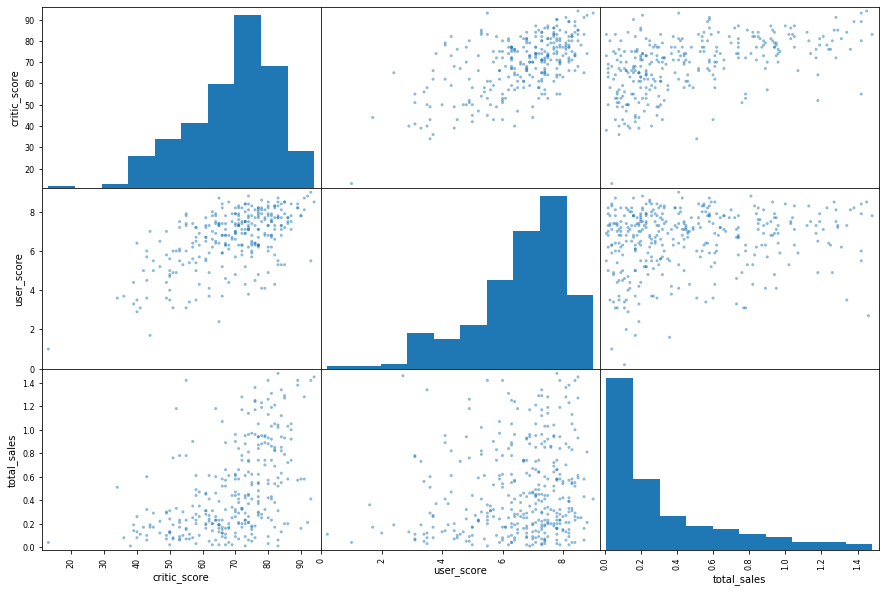

In [46]:
q1 = actual_data_ps3['total_sales'].describe()['25%']
q3 = actual_data_ps3['total_sales'].describe()['75%']
IQR = q3 - q1

actual_data_ps3_no_outliners = (actual_data_ps3
                                .query('@q1 - 1.5*@IQR < total_sales < @q3 + 1.5*@IQR')
                               )
display(actual_data_ps3_no_outliners.corr())
pd.plotting.scatter_matrix(actual_data_ps3_no_outliners, figsize = (15,10))
plt.show()

In [47]:
corr_critic_sales = (actual_data_ps3
                     .query('@q1 - 1.5*@IQR < total_sales < @q3 + 1.5*@IQR')
                     .corr()['critic_score']['total_sales']
                    )
corr_user_sales = (actual_data_ps3
                   .query('@q1 - 1.5*@IQR < total_sales < @q3 + 1.5*@IQR')
                   .corr()['user_score']['total_sales']
                  )

print('Корреляция между оценкой критиков и продажами: {:.2f}'.format(corr_critic_sales))
print('Корреляция между оценкой пользователей и продажами: {:.2f}'.format(corr_user_sales))

Корреляция между оценкой критиков и продажами: 0.50
Корреляция между оценкой пользователей и продажами: 0.15


При исключении из рассмотрения выбросов связь между оценкой и продажами возрасла. То есть влияние есть. При этом есть игпы с высокой оценкой, но низкими продажами. Навернаяка стоит смотреть влияние других факторов: например, жанра игры.

При рассмотрении диаграммы рассеяния по параметрам оценка критиков — оценка пользователей может сложиться впечатление, что и между ними есть зависимость. Возможно, это и так. Но скорее всего у них одинаковая зависимость от другого параметра - от платформы, жанра и самой игры.  

## 3.6 Распределение по жанрам
Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [48]:
(
    actual_data
    .groupby('genre')
    .agg({'total_sales':'sum', 'name':'count'})
    .reset_index()
    .sort_values(by = 'total_sales', ascending = False)
    .style.background_gradient(cmap='Greens')
)

,genre,total_sales,name
0,Action,557.8,1269
8,Shooter,402.91,329
7,Role-Playing,245.63,465
10,Sports,237.15,389
3,Misc,139.42,375
4,Platform,88.68,122
6,Racing,88.36,181
2,Fighting,66.9,159
9,Simulation,50.26,136
1,Adventure,45.04,410


In [49]:
( 
    actual_data
    .groupby('genre')['total_sales']
    .agg({'total_sales':['mean','median']})
    .reset_index()
    .sort_values(ascending = False, by=('total_sales','mean'))
    .style.background_gradient(cmap='Greens')
)

Рассмотрим, какие жанры являются самыми популярными для каждого типа платформы по показателю средних продаж.

In [50]:
df = ( 
    actual_data
    .groupby(['platform','genre'])['total_sales']
    .agg({'total_sales':'mean'})
    .reset_index()
)

for platform in top_platform:
    print(df.loc[df['platform'] == platform].sort_values(by='total_sales', ascending = False).head(1))
    print(" ")

#дополнительно рассмотрим XOne, тк она потенциально прибыльна, но не попала в топ10
print(df.loc[df['platform'] == "XOne"].sort_values(by='total_sales', ascending = False).head(1))

   platform     genre  total_sales
38      PS2  Fighting          0.1
 
    platform    genre  total_sales
116     X360  Shooter      1.47825
 
   platform    genre  total_sales
48      PS3  Shooter     1.284103
 
   platform genre  total_sales
88      Wii  Misc     0.643846
 
   platform         genre  total_sales
19       DS  Role-Playing     0.939091
 
Empty DataFrame
Columns: [platform, genre, total_sales]
Index: []
 
Empty DataFrame
Columns: [platform, genre, total_sales]
Index: []
 
   platform    genre  total_sales
60      PS4  Shooter         2.16
 
   platform     genre  total_sales
66      PSP  Fighting     0.196364
 
   platform         genre  total_sales
31       PC  Role-Playing        0.567
 
    platform    genre  total_sales
127     XOne  Shooter     1.587632


Самый востребованный жанр по проданным копиям - Action. При этом по средним продажам он не попадает даже в пятерку. Значит, что игр этого жанра выпускается большое количество и продажи размазаны по этим играм, то есть приыбвльность каждой отдельно взятой игры не велика. На втором месте по количеству продаж - Shooter, этот жанр также лидирует по среднему и мединному значению продаж. Значит, что игр этого жанра мало, а следовательно каждая отдельная игра более прибыльная. 

Для PS4, XOne, X360 самый популярный жанр - шутер. А для PC — role-playing

## 3.7 Выводы

В игровой индустрии стоит ориентироваться на последние актуальные данные, так как вводные очень быстро меняются и зависят от большого количества переменных. Характерный срок жизни платформы — 6 лет

Актуальный период для построения нашего прогноза: c 2011 по 2017

В качестве потенциально прибыльных из представленных платформ стоит рассмотреть PS4, X360, XOne, PC.

В среднем на все платформы спрос плюс-минус одинаковый, но стоит подумать о том, какой именно жанр на каждой из платформ максимално востребован. 

Между отзывами и продажами нет значимой зависимости. Но если сравнивать их между собой, то продажи сильнее зависят от оценок критиков. При исключении из рассмотрения выбросов связь между оценкой и продажами возрасла. То есть влияние есть, но незначительное.

Самый востребованный жанр по проданным копиям - Action, но приыбвльность каждой отдельно взятой игры в этом жанре не велика. 
На втором месте по количеству продаж - Shooter и каждая отдельная игра более прибыльна.

Для PS4, XOne, X360 самый популярный жанр - шутер. А для PC — role-playing

# 4. Портрет пользователя каждого региона

## 4.1 Самые популярные платформы 
Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

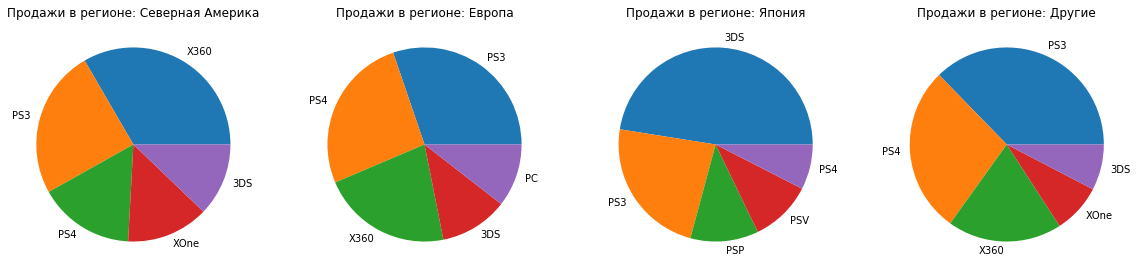

In [51]:
sale_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
#sale_reg = {'na_sales':'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония', 'other_sales':'Другие'}
report = actual_data.groupby('platform')[sale_cols].sum().reset_index()

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20))

labels = report[['na_sales', 'platform']].sort_values(by = 'na_sales', ascending = False)[:5]['platform'].unique()
values = report['na_sales'].sort_values(ascending = False)[:5]
ax1.set_title('Продажи в регионе: Северная Америка')
ax1.pie(values, labels = labels)


labels = report[['eu_sales', 'platform']].sort_values(by = 'eu_sales', ascending = False)[:5]['platform'].unique()
values = report['eu_sales'].sort_values(ascending = False)[:5]
ax2.set_title('Продажи в регионе: Европа')
ax2.pie(values, labels = labels)

    
labels = report[['jp_sales', 'platform']].sort_values(by = 'jp_sales', ascending = False)[:5]['platform'].unique()
values = report['jp_sales'].sort_values(ascending = False)[:5]
ax3.set_title('Продажи в регионе: Япония')
ax3.pie(values, labels = labels)


labels = report[['other_sales', 'platform']].sort_values(by = 'other_sales', ascending = False)[:5]['platform'].unique()
values = report['other_sales'].sort_values(ascending = False)[:5]
ax4.set_title('Продажи в регионе: Другие')
ax4.pie(values, labels = labels)



plt.show()
    

In [52]:
report.style.background_gradient(cmap='Greens')

,platform,na_sales,eu_sales,jp_sales,other_sales
0,3DS,82.65,61.27,100.62,13.27
1,DS,18.86,9.24,8.04,2.59
2,PC,29.88,56.7,0,11.1
3,PS2,0.13,0.13,0.09,0.1
4,PS3,168.26,163.1,49.39,64.82
5,PS4,108.74,141.09,15.96,48.35
6,PSP,2.19,1.77,24.04,1.01
7,PSV,12.47,13.07,21.84,6.43
8,Wii,48.56,29.6,8.97,7.89
9,WiiU,38.1,25.13,13.01,5.95


## 4.2 Самые популярные жанры (топ-5). 
Определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5)

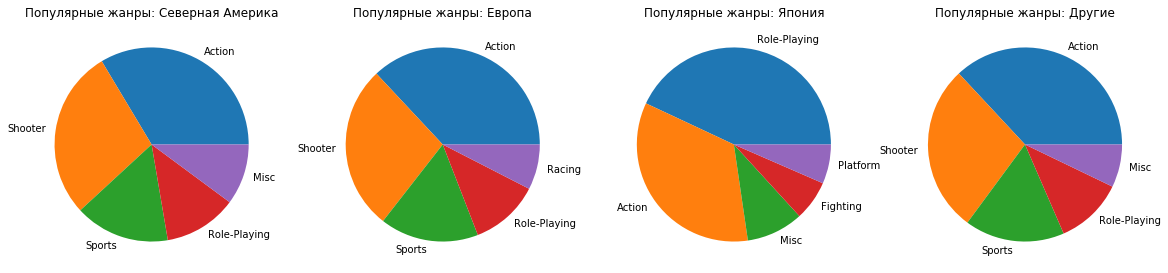

In [53]:
sale_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
#sale_reg = {'na_sales':'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония', 'other_sales':'Другие'}
report = actual_data.groupby('genre')[sale_cols].sum().reset_index()

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20))

labels = report[['na_sales', 'genre']].sort_values(by = 'na_sales', ascending = False)[:5]['genre'].unique()
values = report['na_sales'].sort_values(ascending = False)[:5]
ax1.set_title('Популярные жанры: Северная Америка')
ax1.pie(values, labels = labels)


labels = report[['eu_sales', 'genre']].sort_values(by = 'eu_sales', ascending = False)[:5]['genre'].unique()
values = report['eu_sales'].sort_values(ascending = False)[:5]
ax2.set_title('Популярные жанры: Европа')
ax2.pie(values, labels = labels)

    
labels = report[['jp_sales', 'genre']].sort_values(by = 'jp_sales', ascending = False)[:5]['genre'].unique()
values = report['jp_sales'].sort_values(ascending = False)[:5]
ax3.set_title('Популярные жанры: Япония')
ax3.pie(values, labels = labels)


labels = report[['other_sales', 'genre']].sort_values(by = 'other_sales', ascending = False)[:5]['genre'].unique()
values = report['other_sales'].sort_values(ascending = False)[:5]
ax4.set_title('Популярные жанры: Другие')
ax4.pie(values, labels = labels)

plt.show()
    

In [54]:
report.style.background_gradient(cmap='Greens')

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,230.92,199.12,63.62,64.14
1,Adventure,14.76,13.96,12.07,4.25
2,Fighting,31.63,16.24,12.38,6.65
3,Misc,69.69,39.72,17.6,12.41
4,Platform,38.28,30.07,12.13,8.2
5,Puzzle,2.74,3.56,2.91,0.64
6,Racing,31.98,40.62,5.64,10.12
7,Role-Playing,83.78,62.3,79.87,19.68
8,Shooter,194.43,148.02,11.92,48.54
9,Simulation,15.37,19.72,11.64,3.53


## 4.3 Вляние рейтинга ESRB на продажи в отдельном регионе

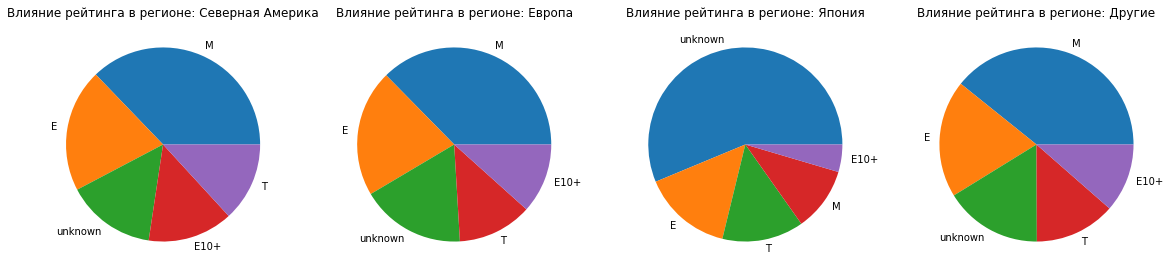

In [55]:
sale_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
#sale_reg = {'na_sales':'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония', 'other_sales':'Другие'}
report = actual_data.groupby('rating')[sale_cols].sum().reset_index()

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20))

labels = report[['na_sales', 'rating']].sort_values(by = 'na_sales', ascending = False)[:5]['rating'].unique()
values = report['na_sales'].sort_values(ascending = False)[:5]
ax1.set_title('Влияние рейтинга в регионе: Северная Америка')
ax1.pie(values, labels = labels)


labels = report[['eu_sales', 'rating']].sort_values(by = 'eu_sales', ascending = False)[:5]['rating'].unique()
values = report['eu_sales'].sort_values(ascending = False)[:5]
ax2.set_title('Влияние рейтинга в регионе: Европа')
ax2.pie(values, labels = labels)

    
labels = report[['jp_sales', 'rating']].sort_values(by = 'jp_sales', ascending = False)[:5]['rating'].unique()
values = report['jp_sales'].sort_values(ascending = False)[:5]
ax3.set_title('Влияние рейтинга в регионе: Япония')
ax3.pie(values, labels = labels)


labels = report[['other_sales', 'rating']].sort_values(by = 'other_sales', ascending = False)[:5]['rating'].unique()
values = report['other_sales'].sort_values(ascending = False)[:5]
ax4.set_title('Влияние рейтинга в регионе: Другие')
ax4.pie(values, labels = labels)

plt.show()
    

In [56]:
report.style.background_gradient(cmap='Greens')

,rating,na_sales,eu_sales,jp_sales,other_sales
0,E,170.17,141.73,36.68,40.86
1,E10+,117.72,78,11.23,23.91
2,EC,0.42,0,0,0.03
3,M,308.45,250.26,26.14,81.96
4,RP,0,0.03,0,0.01
5,T,109.31,83.16,33.39,28.17
6,unknown,123.69,116.65,138.21,33.98


## 4.4 Выводы

Самые популярные платформы - XBox, PS3, PS4. Но в Японии лидирует 3DS. 
Самые популярные жанры — Экшн, Шутер и Спорт. Но в Японии лидирует Role Playing.
На первом месте по рейтингу игры для тех, кто достиг 17 лет; следом идут "игры для всех". Но в Японии в лидерах неизвестный рейтинг. 

# 5. Проверка гипотез

**Гипотеза 1:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Гипотеза 2:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


## 5.1 Первая гипотеза

Необходимо сравнить средние двух генеральных совокупностей по взятым из них выборкам. В этом случае гипотезы звучат так: 
- H0: средние пользовательские рейтинги платформ XBox One и PC равны. 
- H1: средние пользовательские рейтинги платформ XBox One и PC равны.

Посмотрим, чему равно среднее по выборке:

In [57]:
actual_data.query('platform == "XOne" or platform == "PC"').groupby('platform')['user_score'].mean().to_frame()

,user_score
platform,
PC,6.451792
XOne,6.521429


Средние кажутся очень близкими друг к другу. 

Построим гистрограммы распределения и вычсилим дисперсию для каждой выборки, чтобы понять, как проводить тест. 

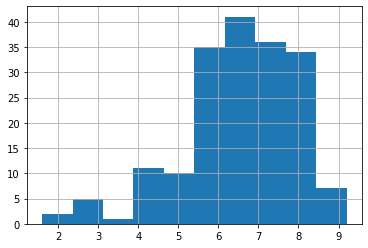

In [58]:
actual_data.query('platform == "XOne"')['user_score'].hist(bins = 10)
plt.show()

In [59]:
print('Дисперсия по выборке XBox One')
actual_data.query('platform == "XOne"')['user_score'].var()

Дисперсия по выборке XBox One


1.9069968429360695

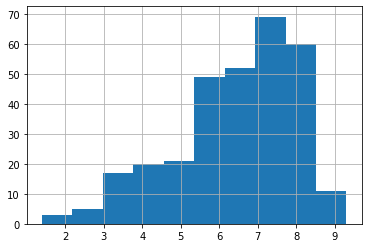

In [60]:
actual_data.query('platform == "PC"')['user_score'].hist(bins = 10)
plt.show()

In [61]:
print('Дисперсия по выборке PC')
actual_data.query('platform == "PC"')['user_score'].var()

Дисперсия по выборке PC


2.596295799535884

Дисперсии не равны, поэтому будем проводить тетсирование при условии неравенства дисперсий. Неравенство в целом понятно — данные взяты из различных источников

In [62]:
sample_1 = actual_data.query('platform == "XOne" and user_score.notna()')['user_score']
sample_2 = actual_data.query('platform == "PC" and user_score.notna()')['user_score']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var = False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


Вероятность случайности появления разницы между средними двух выборок достаточно велика для того, чтобы принять решение: мы не можем отвергнуть нулевую гипотезу. Это означает, что нельзя отверготь возможность того, что средние оценки пользователей по платформам XBox и PC могут быть равны между собой.

## 5.2 Вторая гипотеза 
Необходимо сравнить средние двух генеральных совокупностей по взятым из них выборкам. В этом случае гипотезы звучат так: 
- H0: средние пользовательские рейтинги жанров Action равны и Sports равны. 
- H1: средние пользовательские рейтинги жанров Action равны и Sports не равны.

Посмотрим, чему равно среднее по выборке:


In [63]:
actual_data.query('genre == "Action" or genre == "Sports"').groupby('genre')['user_score'].mean().to_frame()

,user_score
genre,
Action,6.775904
Sports,5.650813


Средние кажутся близкими друг к другу, но не настолько, чтобы однозначно заявлять о их равенстве. 

Построим гистрограммы распределения и вычсилим дисперсию для каждой выборки, чтобы понять, как проводить тест. 

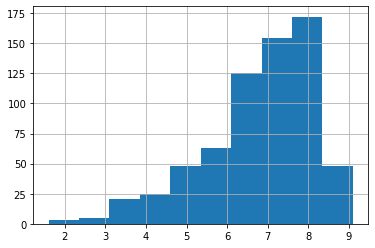

In [64]:
actual_data.query('genre == "Action"')['user_score'].hist(bins = 10)
plt.show()

In [65]:
print('Дисперсия по выборке Action')
actual_data.query('genre == "Action"')['user_score'].var()

Дисперсия по выборке Action


1.8118770103036583

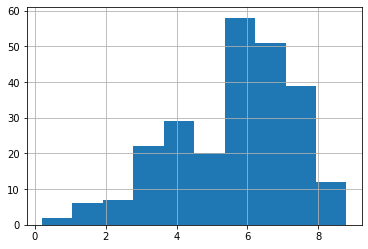

In [66]:
actual_data.query('genre == "Sports"')['user_score'].hist(bins = 10)
plt.show()

In [67]:
print('Дисперсия по выборке Action')
actual_data.query('genre == "Sports"')['user_score'].var()

Дисперсия по выборке Action


2.8825095404015264

Дисперсии не равны, поэтому будем проводить тетсирование при условии неравенства дисперсий. Неравенство в целом понятно — данные взяты из различных источников

In [68]:
sample_1 = actual_data.query('genre == "Action" and user_score.notna()')['user_score']
sample_2 = actual_data.query('genre == "Sports" and user_score.notna()')['user_score']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var = False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


Вероятность случайности появления разницы между средними двух выборок очень мала (меньше порога статистической значимости). То есть мы мы не можем принять нулевую гипотезу. Это означает, что не стоит рассматривать вариант, в котором оценки в жанрах экшн и спорт близки друг другу.

# 6. Общие выводы
Целью проекта было выявить **определяющие успешность игры закономерности**. 

На успешность игры влияет: 
- регион продажи. для каждого конкретного региона стоит учитывать предпочтения пользователей: жанра и платформы.
- игры следует выпускать, ориентируясь на срок жизни платформы, под который она выпускается. Сколько можно продать копий игры на последнем году активной жизни платформы? Вероятно, что меньше, чем если начать продавать игры в первй год.
- на успешность игры не оказывает сильного влияния оценка пользователей, но оценка критиков может повысить продажи
